In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [3]:
use_cols=['Date','Close']
data2=pd.read_csv("timeseriesdata.csv",usecols=use_cols)

In [4]:
data2['date']= pd.to_datetime(data2.Date)

In [5]:
data2['Year']=data2.date.dt.year
data2['Month']=data2.date.dt.month
data2['Day']=data2.date.dt.day

In [6]:
data=data2.drop(['Date', 'date'], axis = 1) 

In [7]:
x=data.iloc[:,1:4]
y=data.iloc[:,0:1]

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=.25,random_state=20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train= scaler.transform(y_train)
scaler.fit(y_test)
y_test = scaler.transform(y_test)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [11]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8099163306707984


In [12]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8099163306707984


In [13]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

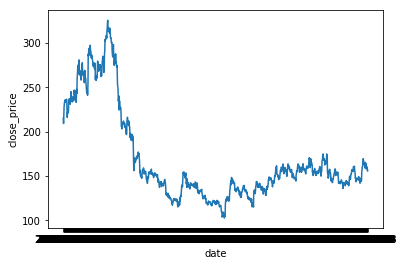

In [14]:
plt.ylabel('close_price')
plt.xlabel('date')
plt.plot(data2['Date'],data2['Close'])